In [4]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm

pd.set_option('float_format', '{:6.4f}'.format)
sns.set(style='ticks')

import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv("villa.csv")

In [ ]:
df.head()

In [ ]:
#2
p_h=df[['price','house']]

In [ ]:
p_h.describe()

In [6]:
#3
p_h['ln_p']=p_h['price'].map(lambda x: np.log(x))
p_h['ln_h']=p_h['house'].map(lambda x: np.log(x))

In [7]:
p_h.describe()

,price,house,ln_p,ln_h
count,50.0000,50.0000,50.0000,50.0000
mean,78.2500,192.2400,3.7847,4.9051
std,84.3432,151.8475,1.1449,0.8969
min,5.0000,22.0000,1.6094,3.0910
25%,16.6250,61.2500,2.8108,4.1144
50%,46.0000,160.0000,3.8284,5.0732
75%,99.0000,300.0000,4.5950,5.7038
max,320.0000,600.0000,5.7683,6.3969


In [8]:
p_h.head()

,price,house,ln_p,ln_h
0,300.0000,400,5.7038,5.9915
1,60.0000,170,4.0943,5.1358
2,14.0000,60,2.6391,4.0943
3,38.0000,65,3.6376,4.1744
4,85.0000,320,4.4427,5.7683


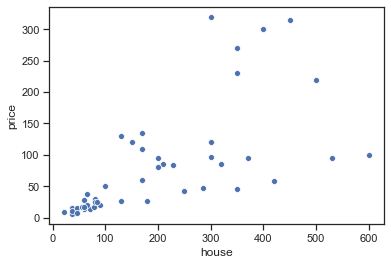

In [9]:
#4 
sns.scatterplot(x=p_h['house'],y=p_h['price'])
plt.show()

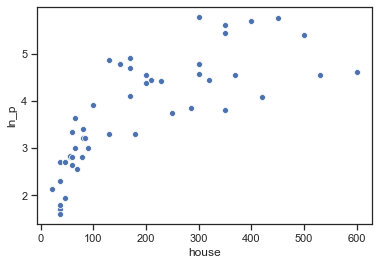

In [10]:
sns.scatterplot(x=p_h['house'],y=p_h['ln_p'])
plt.show()

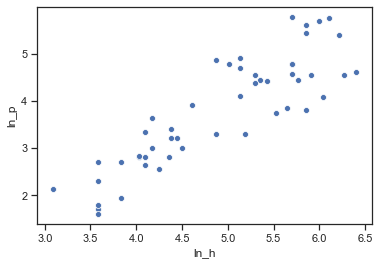

In [11]:
sns.scatterplot(x=p_h['ln_h'],y=p_h['ln_p'])
plt.show()

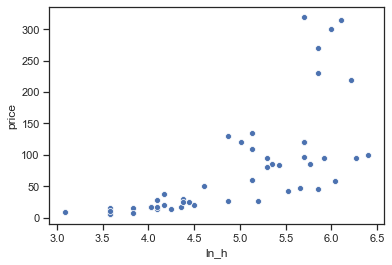

In [12]:
sns.scatterplot(x=p_h['ln_h'],y=p_h['price'])
plt.show()

Все 4 модели имеют положительную корреляцию, самое наименьшее значение корреляции, вероятно, у 4 модели,  1 модель имеет очень большой разброс то есть R^2 у этой модели будет иметь,скорее всего, не очень большое значение, по сравнению с остальными, 2 модель больше похожа на логарифмическую зафисимость, что мы и делали, 3 модель, по сравнению с остальными имеет небольшой разброс точек, они достаточтно плотно расположены, вероятно, будет иметь самое большое значение R^2, 4 модель чем-то напоминает квадратичную зависимость, после значения 5 по Х, имет достаточно большой разброс  

Из всех моделей, ближе всего напоминает линейную зависимсоть 3 модель

In [13]:
#5
from statsmodels.regression.linear_model import OLS
model = OLS(p_h['price'],sm.add_constant(p_h['house']))
result = model.fit(cov_type='HC0') 
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     20.68
Date:                Thu, 28 Nov 2019   Prob (F-statistic):           3.69e-05
Time:                        22:34:52   Log-Likelihood:                -277.06
No. Observations:                  50   AIC:                             558.1
Df Residuals:                      48   BIC:                             561.9
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3103     10.036      0.629      0.5

In [14]:
from statsmodels.regression.linear_model import OLS
model = OLS(p_h['price'],sm.add_constant(p_h['house']))
result = model.fit() 
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     39.90
Date:                Thu, 28 Nov 2019   Prob (F-statistic):           8.22e-08
Time:                        22:34:52   Log-Likelihood:                -277.06
No. Observations:                  50   AIC:                             558.1
Df Residuals:                      48   BIC:                             561.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3103     14.458      0.436      0.6

Стандартная ошибка для B1 0,082 при гетероскедостичности и 0,059 при гомоскедостичности, на 5% уровне значимости при гетероскедостичности гипотеза H0 для коэффициента В1 отвергается(H0:B1=0), в пользу Н1(H1:B1!=0), аналогично и для гомоскедостичности. 
2) F статистика имеет разные значения, но в обоих случаях отвергается гипотеза H0 (что все беты в модели равны 0) в пользу H1 на 5% уровне значимсоти при прочих равных.

1)на 5% уровне значимости для коэффициента B0 гипотеза H0 не отвергается=> B0 незначимые коэффициент, что касается B1, то гипотеза H0 отвергается в пользу H1, B1 ялвяется значимым, трактовать можно только значимые коэффициенты. на 5% уровне значимости при увеличении площади на 1 кв м, стоимость дома увеличивается на 0.37 в тысячах долларах, при прочих равных в среднем. Число наблюдений 50 и степеней свободы 48. 

In [15]:
#7 ln price , house
model = OLS(p_h['ln_p'] , sm.add_constant(p_h['house']))
result = model.fit(cov_type='HC0') 
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   ln_p   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     46.92
Date:                Thu, 28 Nov 2019   Prob (F-statistic):           1.25e-08
Time:                        22:34:53   Log-Likelihood:                -54.589
No. Observations:                  50   AIC:                             113.2
Df Residuals:                      48   BIC:                             117.0
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6663      0.171     15.564      0.0

In [16]:
# ln price, ln house 
model = OLS(p_h['ln_p'],sm.add_constant(p_h['ln_h']))
result = model.fit(cov_type='HC0') 
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   ln_p   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     156.0
Date:                Thu, 28 Nov 2019   Prob (F-statistic):           1.07e-16
Time:                        22:34:53   Log-Likelihood:                -41.313
No. Observations:                  50   AIC:                             86.63
Df Residuals:                      48   BIC:                             90.45
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6815      0.415     -4.049      0.0

In [17]:
# price, ln house
model = OLS(p_h['price'],sm.add_constant(p_h['ln_h']))
result = model.fit(cov_type='HC0') 
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     36.40
Date:                Thu, 28 Nov 2019   Prob (F-statistic):           2.23e-07
Time:                        22:34:54   Log-Likelihood:                -276.10
No. Observations:                  50   AIC:                             556.2
Df Residuals:                      48   BIC:                             560.0
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -239.4924     45.565     -5.256      0.0

Самое большое значение adj R^2 имеет 2 модель ln_price, ln_house, у всех моделей F-statics имеет высокое значение, значит гипотеза о том, что все коэффициенты = 0 отвергается, так же у 2 модели самый хороший показатель по AIC BIC, то есть самый маленький, 86 и 90 соответственно. При этом у 2 модели хороший показатель в st error, по сравнению с 3, где очень большие значения. На 5% уровне значимости во всех моделях коэффициенты B0 и B1 значимы.
1) при увеличении площади дома на 1 кв м, стоимость дома увеличивается на (e^0.0058-1)*100% = 0.58% при прочих равных в среднем
2) при увеличении площади дома на 1%, стоимость увеличивается на 0.0058% при прочих равных в среднем
3) при увеличении площади дома на 1%, стоимость увеличивается на 0.000058 тыс. доллар при прочих равных в среднем

In [18]:
#8
model = OLS(p_h['ln_p'], sm.add_constant(p_h['ln_h']))
result = model.fit(cov_type='HC0')

prediction = result.get_prediction(sm.add_constant(p_h['ln_h']))
mean = prediction.summary_frame()['mean']
mean_ci_lower = prediction.summary_frame()['mean_ci_lower']
mean_ci_upper = prediction.summary_frame()['mean_ci_upper']

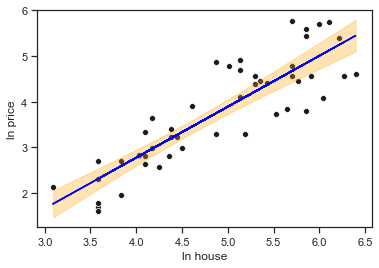

In [19]:
x=p_h['ln_h']
y=mean_ci_lower
y1=mean_ci_upper

sns.scatterplot(x,y=p_h['ln_p'],color='k')
plt.plot(x, mean , color = 'blue')
plt.fill_between(x.sort_values(),y.sort_values(),y1.sort_values(),color='orange',alpha=0.3)
plt.xlabel('ln house')
plt.ylabel("ln price")
plt.show()

Выбрал 2 модель из 7 пункта, так как значение adj R^2 имеет хорошее значение, по сравнению с другими моделями, так же по значениям AIC BIC имеет самое минимальное значение, по отношение к другим

In [20]:
#2_1
df2=pd.read_csv("expend.csv")

In [32]:
np.sort(np.array(x))

array([3.09104245, 3.58351894, 3.58351894, 3.58351894, 3.58351894,
       3.58351894, 3.8286414 , 3.8286414 , 4.02535169, 4.02535169,
       4.09434456, 4.09434456, 4.09434456, 4.17438727, 4.17438727,
       4.24849524, 4.35670883, 4.38202663, 4.38202663, 4.44265126,
       4.49980967, 4.60517019, 4.86753445, 4.86753445, 5.01063529,
       5.13579844, 5.13579844, 5.13579844, 5.19295685, 5.29831737,
       5.29831737, 5.34710753, 5.42934563, 5.52146092, 5.65248918,
       5.70378247, 5.70378247, 5.70378247, 5.70378247, 5.768321  ,
       5.85793315, 5.85793315, 5.85793315, 5.91350301, 5.99146455,
       6.04025471, 6.10924758, 6.2146081 , 6.27287701, 6.39692966])

In [21]:
#2_2
df2=df2[['tot3','f3']]
df2.describe()

,tot3,f3
count,427.0000,427.0000
mean,35762.8059,6890.8819
std,18053.3135,2745.7483
min,8728.8603,883.9856
25%,23189.4650,4946.0914
50%,31847.1185,6838.4314
75%,44050.5167,8788.3583
max,124564.1872,17270.7470


In [22]:
#2_3
df2['ln_tot3']=df2['tot3'].map(lambda x: np.log(x))
df2['ln_f3']=df2['f3'].map(lambda x: np.log(x))

In [23]:
df2.describe()

,tot3,f3,ln_tot3,ln_f3
count,427.0000,427.0000,427.0000,427.0000
mean,35762.8059,6890.8819,10.3689,8.7413
std,18053.3135,2745.7483,0.4838,0.4759
min,8728.8603,883.9856,9.0744,6.7844
25%,23189.4650,4946.0914,10.0515,8.5063
50%,31847.1185,6838.4314,10.3687,8.8303
75%,44050.5167,8788.3583,10.6931,9.0812
max,124564.1872,17270.7470,11.7326,9.7568


In [24]:
#4
model = OLS(df2.ln_f3, sm.add_constant(df2.ln_tot3))
result = model.fit(cov_type='HC0') 
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  ln_f3   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     163.3
Date:                Thu, 28 Nov 2019   Prob (F-statistic):           7.16e-32
Time:                        22:34:57   Log-Likelihood:                -208.53
No. Observations:                 427   AIC:                             421.1
Df Residuals:                     425   BIC:                             429.2
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0466      0.449      6.781      0.0

на 5% уровне значимости коэффициент B1 является значимым, трактовать можно только значимые коэффициенты
на 5% уровне значимости при увеличении расходов в голландских гульденов на 1%, расходы на питание в семье в голандских гульденах увеличиваются на 0.54%, стандартная ошибка не имеет очень относительно большое значение p value = 0, Гипотеза H0 отвергается для B0=0 в пользу H1 где B0!=0, так как z статистика не попадает в интервал H0 на 5% уровне значимости.

In [35]:
#5
model = OLS(df2.ln_f3, sm.add_constant(df2.ln_tot3))
results = model.fit(cov_type='HC0')
tt=results.t_test('ln_tot3 =0.5')
print(tt.summary(alpha=0.05))
print(tt.summary(alpha=0.1))

                             Test for Constraints                             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.5492      0.043      1.145      0.252       0.465       0.633
                             Test for Constraints                             
                 coef    std err          z      P>|z|       [0.05       0.95]
------------------------------------------------------------------------------
c0             0.5492      0.043      1.145      0.252       0.479       0.620


при этом тесте тестируется гипотеза H0: b1=0.5, альтернативная гипотеза Б1!=0.5, при этом гипотеза в обоих случаях отвергается на 5% и 10% уровне значимости, так как z-статистика не попадает в интервал(2 правых значения интервала)

In [37]:
#6
tt.tvalue()

array([[1.14509293]])